# Análisis de Relaciones

In [1]:
import os
os.environ["MPLBACKEND"] = "agg"
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Comenzamos por importar las librerias.

In [2]:
# estaremos definiendo ambos csvs para poder tener acceso a ambos pero usaremos el train y luego sobre el test replicaremos una vez se considere importante
dftest = pd.read_csv("../data/test.csv")

# Definir NA como nuestros NaN
dftrain = pd.read_csv("../data/train.csv", na_values=["NA"])

# incluimos en el analissi exploratorio lo basico para poder tenerlo a la mano
dftrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Estadísticas básicas
print(dftrain['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


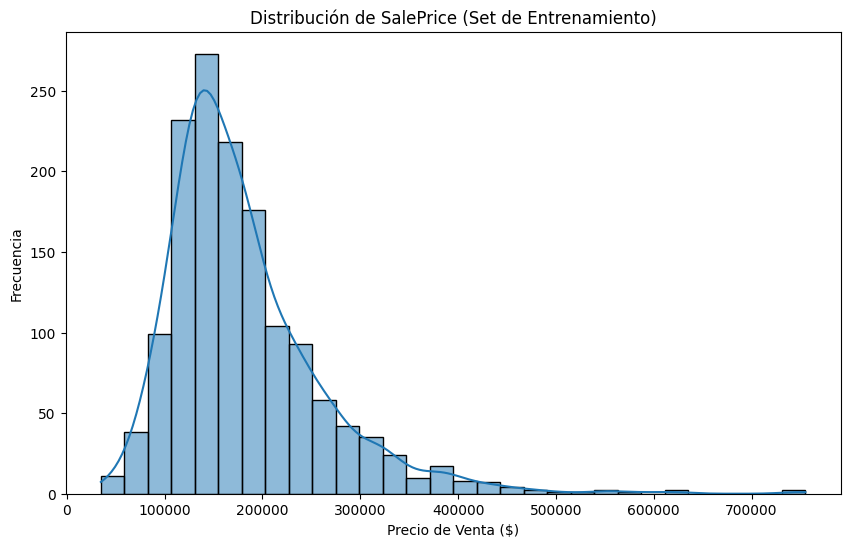

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(dftrain['SalePrice'], bins=30, kde=True)
plt.title('Distribución de SalePrice (Set de Entrenamiento)')
plt.xlabel('Precio de Venta ($)')
plt.ylabel('Frecuencia')
plt.show()

## ¿Qué podemos concluir?
- Sesgo Positivo: La distribución de SalePrice está sesgada hacia la derecha, lo que es típico en precios de viviendas. Esto significa que hay más casas con precios bajos a medios, y pocas con precios muy altos.
- Rango: Los precios varían desde aproximadamente $50,000  hasta  $700,000, con la mayoría (más del 50%) entre $100,000 y $250,000.

Ahora vamos a ver la correlación de las varaibles con nuestra varible de interés.

In [5]:
#Calcular la correlación con SalePrice
numeric_features = dftrain.select_dtypes(include=['number'])
correlations = numeric_features.corr()['SalePrice'].sort_values(ascending=False)
correlations


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


Tomamos ahora las varibles con mejor correlación.

Outliers en GrLivArea:
        Id  GrLivArea  SalePrice  OverallQual Neighborhood  1stFlrSF
58      59       2945     438780           10      StoneBr      1426
118    119       3222     320000            7      SawyerW      1699
185    186       3608     475000           10      OldTown      1518
197    198       3112     235000            8        NAmes      1360
231    232       2794     403000            8      NoRidge      1490
304    305       3493     295000            7      OldTown      1675
324    325       2978     242000            7        NAmes      1898
496    497       3228     430000            8      NoRidge      3228
523    524       4676     184750           10      Edwards      3138
583    584       2775     325000           10      OldTown      1521
608    609       3194     359100            8      Crawfor      1940
635    636       3395     200000            6        SWISU      1440
691    692       4316     755000           10      NoRidge      2444
769    770 

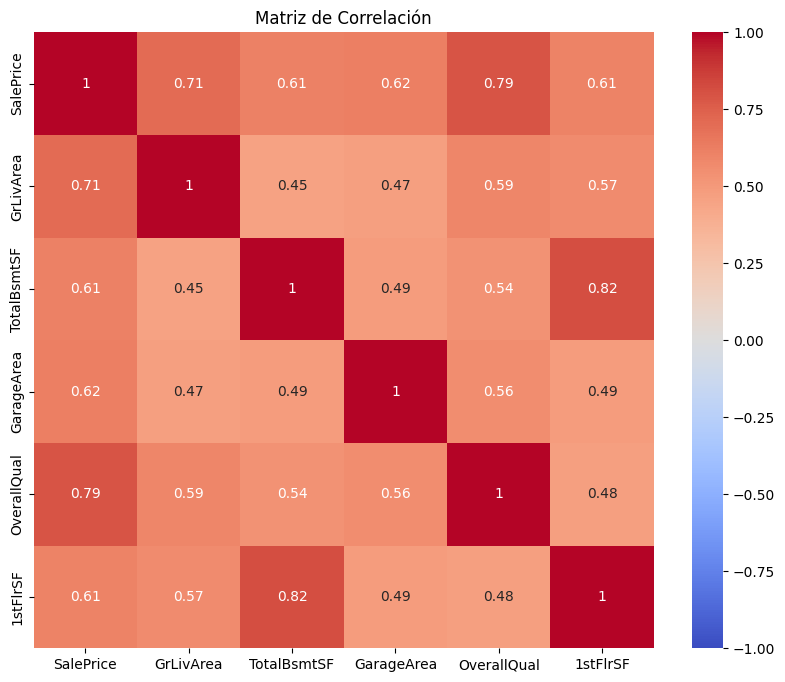

In [6]:

Q1 = dftrain['GrLivArea'].quantile(0.25)
Q3 = dftrain['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dftrain[(dftrain['GrLivArea'] < lower_bound) | (dftrain['GrLivArea'] > upper_bound)]
print("Outliers en GrLivArea:")
print(outliers[['Id', 'GrLivArea', 'SalePrice', 'OverallQual', 'Neighborhood', '1stFlrSF']])

# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = dftrain[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'OverallQual', '1stFlrSF']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

## Resumen de la Matriz de Correlación

La matriz de correlación muestra que OverallQual (0.79) y GrLivArea (0.71) son los predictores más fuertes de SalePrice, indicando una relación positiva significativa con el precio de venta. GarageArea (0.62) y TotalBsmtSF (0.61) también influyen, aunque menos. No hay multicolinealidad severa (correlaciones 0.45-0.59), permitiendo usar estas variables juntas en un modelo.

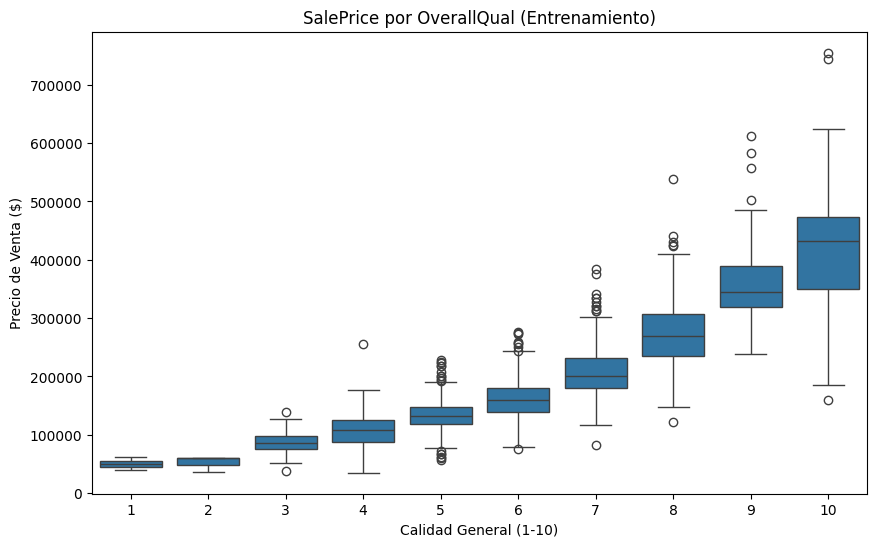

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=dftrain)
plt.title('SalePrice por OverallQual (Entrenamiento)')
plt.xlabel('Calidad General (1-10)')
plt.ylabel('Precio de Venta ($)')
plt.show()

## Lo que podemos concluir del precio de venta con la calidad
- Los precios de las casas aumentan consistentemente a medida que la calidad general (OverallQual) sube, desde 1 (muy baja) hasta 10 (muy excelente). Casas con OverallQual bajo (1-4) tienen precios medianos de $50,000-$150,000, mientras que las de OverallQual alto (8-10) alcanzan medianas de $300,000-$400,000.
- La variabilidad en los precios crece con OverallQual más alto, y hay outliers en niveles 8-10, con precios tan altos como $600,000-$700,000, indicando casas excepcionalmente caras con alta calidad.
- OverallQual es un predictor muy importante del precio, con un impacto directo y significativo en el valor de las propiedades.

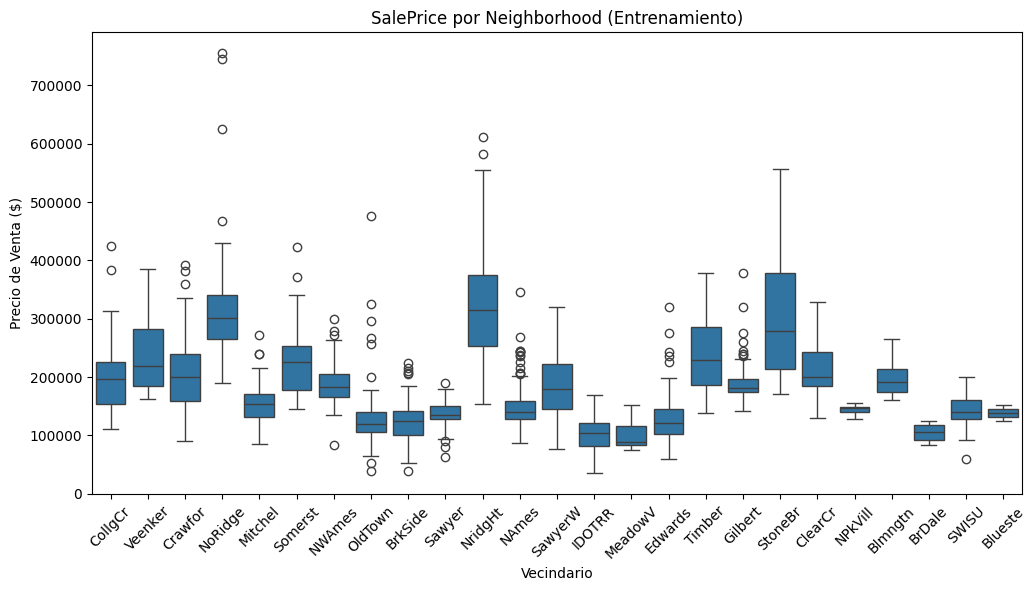

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=dftrain)
plt.title('SalePrice por Neighborhood (Entrenamiento)')
plt.xlabel('Vecindario')
plt.ylabel('Precio de Venta ($)')
plt.xticks(rotation=45)
plt.show()

## ¿Que podemos decir de los condominios?
- Los precios de las casas varían significativamente según el vecindario. Barrios como NoRidge y NridgHt tienen medianas de precios más altos (alrededor de $300,000-$400,000), mientras que barrios como BrDale, IDOTRR, y MeadowV tienen medianas más bajas (cerca de $100,000-$150,000).
- Algunos vecindarios, como NoRidge y NridgHt, tienen outliers con precios muy altos (hasta $600,000-$700,000), indicando casas excepcionalmente caras. Otros, como OldTown o BrkSide, tienen precios más consistentes pero con menos variabilidad.
- La ubicación es un factor clave para el precio de las casas, con barrios premium (NoRidge, NridgHt) asociándose con precios más altos, probablemente debido a mejor calidad, tamaño o prestigio. Barrios menos deseables (IDOTRR cerca de vías férreas) tienen precios más bajos.

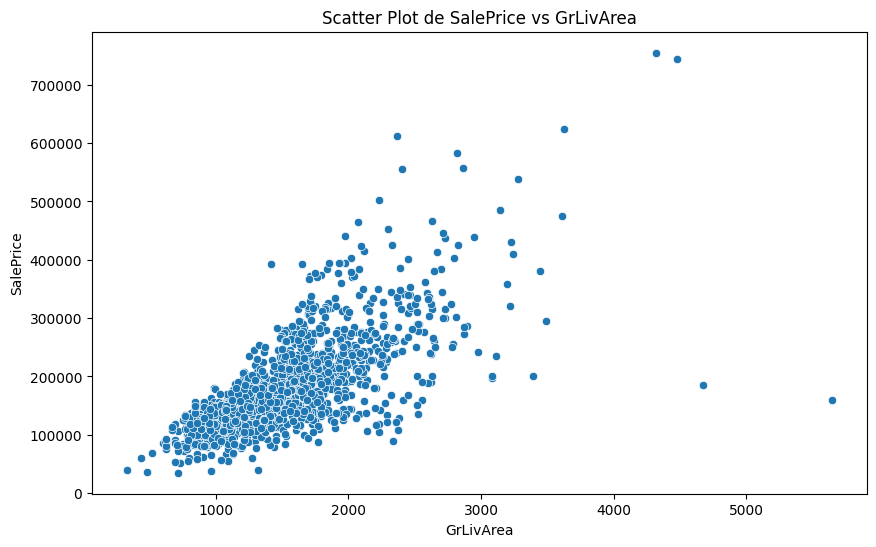

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=dftrain)
plt.title('Scatter Plot de SalePrice vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


## Si afecta el área de la vivienda

- Hay una correlación positiva entre el área habitable y el precio de venta. A medida que el área habitable aumenta, el precio de venta tiende a aumentar.

- Para valores más altos de GrLivArea (superiores a 4000), los precios de venta son más dispersos, lo que indica que otros factores pueden estar influyendo en el precio.

- Hay algunos puntos en la parte inferior derecha con un área muy grande (>4000) pero precios bajos. Podrían ser propiedades con problemas, ventas inusuales o errores en los datos.
También hay algunas casas con precios mucho más altos de lo esperado (por encima de los 700,000), lo que sugiere propiedades de lujo.

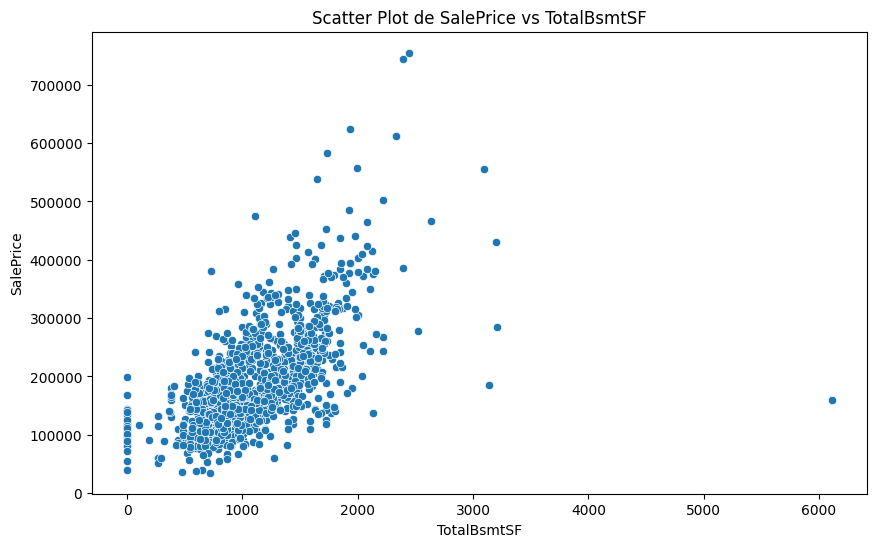

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=dftrain)
plt.title('Scatter Plot de SalePrice vs TotalBsmtSF')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

## ¿Cómo se comporta el área del sótano?

- Existe una relación positiva entre el área total del sótano y el precio de venta. A medida que el sótano es más grande, el precio tiende a ser mayor.

- Para valores pequeños de TotalBsmtSF (menores a 1000 pies cuadrados), los precios de venta varían menos y tienden a concentrarse en un rango más bajo.

- Para sótanos grandes (>2000 pies cuadrados), hay una mayor variabilidad en los precios de venta. Esto sugiere que, aunque el tamaño del sótano influye, otros factores como la calidad de la construcción o la ubicación también juegan un papel clave.
Algunas casas con sótanos grandes tienen precios notablemente bajos, lo que podría indicar ventas forzadas, renovaciones necesarias o datos atípicos.

- Hay un punto aislado con un sótano extremadamente grande (>6000 pies cuadrados) y un precio relativamente bajo. Podría ser un error en los datos o una propiedad con características atípicas.

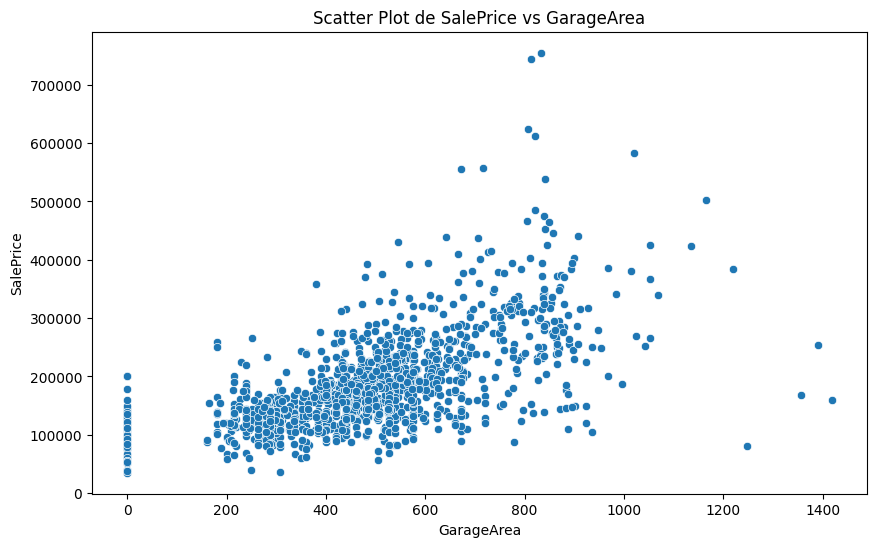

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GarageArea', y='SalePrice', data=dftrain)
plt.title('Scatter Plot de SalePrice vs GarageArea')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()


## ¿Tan importante es el tamaño del garage?

- Se observa una tendencia creciente: a mayor tamaño del garaje, el precio de venta tiende a ser mayor.
- Sin embargo, la dispersión es notablemente mayor en comparación con las gráficas anteriores (GrLivArea y TotalBsmtSF), lo que indica que el área del garaje tiene menos impacto en el precio de venta.
- En la parte izquierda del gráfico, hay una agrupación de casas con GarageArea = 0. Estas viviendas probablemente no tienen garaje y suelen tener precios de venta más bajos.
- Para garajes más grandes (>800 pies cuadrados), la variabilidad de los precios es más alta. Algunos puntos con garajes muy grandes (1000-1400 pies cuadrados) presentan precios bajos, lo que sugiere outliers o casos atípicos.

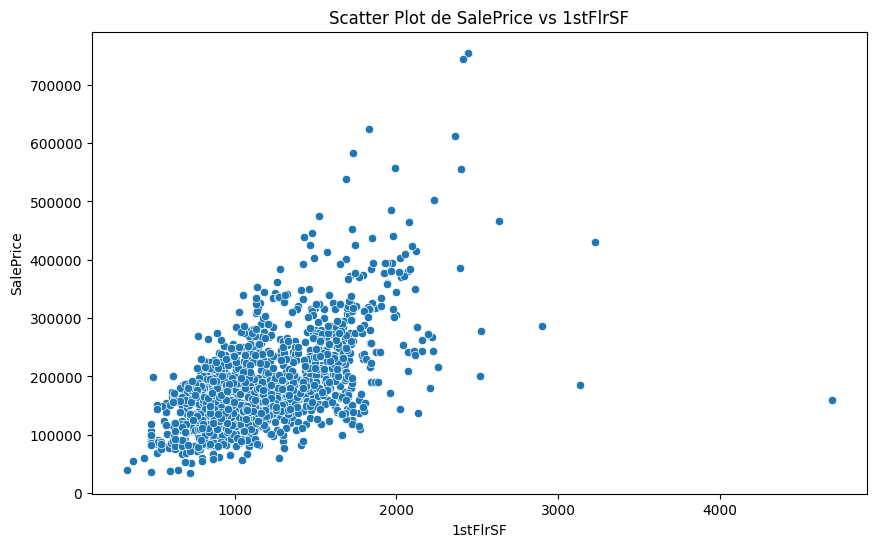

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=dftrain)
plt.title('Scatter Plot de SalePrice vs 1stFlrSF')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.show()


## Primer piso de la casa

- Existe una clara tendencia creciente: a medida que el área del primer piso aumenta, el precio de venta también tiende a aumentar.
- La dispersión es menor en comparación con otras variables como GarageArea, lo que sugiere que el tamaño del primer piso es un factor relevante en la determinación del precio de venta.

- La mayoría de las casas tienen un primer piso entre 800 y 2000 pies cuadrados, con precios en un rango de 100,000 a 400,000.
- Más allá de 2000 pies cuadrados, los precios son más variables, lo que indica que otros factores además del área comienzan a influir en el precio.

- Para casas con primeros pisos más grandes (>2500 pies cuadrados), la variabilidad de precios aumenta considerablemente.Algunos puntos con áreas grandes no tienen precios tan altos como se esperaría, lo que puede sugerir:
   - Ubicación menos deseable
   - Calidad de construcción inferior
   - Propiedades antiguas o con menos acabados de lujo